In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
# plots scatterplot, 5 overview top 5 and bottom 5, 

In [2]:
# loading the modeling data into a dataframe
bank_desert_df = pd.read_parquet('../census_with_bsd.parquet')

In [3]:
# creating dummy variables for categorical columns
bank_desert_df = pd.get_dummies(bank_desert_df, columns=['Majority Race', 'Majority Gender', 'Community Type', 'Majority Age'], drop_first=True, dtype=int)

In [6]:
# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(bank_desert_df.drop(columns='Bank Desert Status'), bank_desert_df['Bank Desert Status'], test_size=.2, random_state=42,stratify=bank_desert_df['Bank Desert Status'])

In [7]:
# scaling the data
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = pd.DataFrame(data=scaler.transform(X=x_train), columns=x_train.columns)
scaled_x_test = pd.DataFrame(data=scaler.transform(X=x_test), columns=x_test.columns)

In [8]:
# instantiating the logistic regressor
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=101)

In [9]:
# instantiating the feature selector based on recall and fitting it
lr_feature_selector_recall = SequentialFeatureSelector(lr_model, scoring='recall', n_features_to_select=6)
lr_feature_selector_recall.fit(x_train.values, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=101,
                                                       solver='liblinear'),
                          n_features_to_select=6, scoring='recall')

In [10]:
# instantiating the feature selector based on accuracy and fitting it
lr_feature_selector_accuracy = SequentialFeatureSelector(lr_model, scoring='accuracy', n_features_to_select=6)
lr_feature_selector_accuracy.fit(x_train.values, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=101,
                                                       solver='liblinear'),
                          n_features_to_select=6, scoring='accuracy')

In [11]:
# features for recall
lr_feature_selector_recall.get_feature_names_out()

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype=object)

In [12]:
# features for accuracy
lr_feature_selector_accuracy.get_feature_names_out()

array(['x0', 'x5', 'x6', 'x15', 'x17', 'x18'], dtype=object)

In [13]:
# displaying the two variables that were chosen by both recall and accuracy
bank_desert_df.iloc[:,5:7].head()

,VacantHous%,OwnOcpHous%
0,0.045020,0.708049
1,0.088050,0.637317
2,0.032520,0.758420
3,0.039849,0.522886
4,0.135397,0.700193


<Axes: xlabel='Bank Desert Status', ylabel='OwnOcpHous%'>

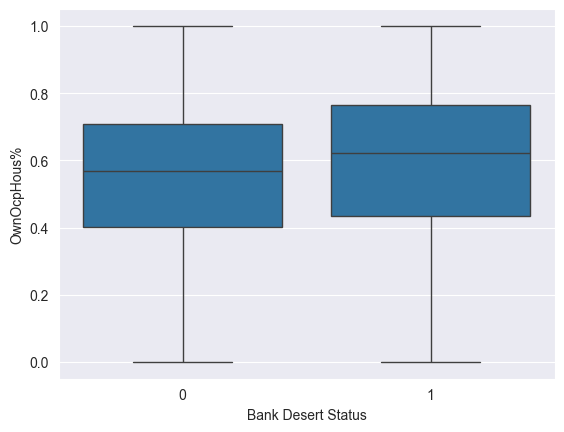

In [15]:
# boxplot of binary Bank Desert Status and OwnOcpHous%
sns.boxplot(bank_desert_df, x="Bank Desert Status", y="OwnOcpHous%")

In [16]:
# loading the final dataset into a dataframe
complete_df = pd.read_parquet('../acs5_final.parquet')

In [17]:
# examining the full dataset
complete_df.head()

,GEOID,Census Tract Name,House Units,Income,Poverty%,Employment%,Disability%,VacantHous%,OwnOcpHous%,Majority Race,...,Minority Race Percentage,Majority Gender,Majority Gender Percentage,Minority Gender,Majority Age,Majority Age Percentage,Minority Age,Community Type,Bank Desert Status,Population Density
0,01001020100,Census Tract 201; Autauga County; Alabama,733,60563.0,0.153351,0.974255,0.200000,0.045020,0.708049,White%,...,0.111528,Male%,0.519035,Female%,18_64%,0.565684,Under18%,Urban,bank desert,491.621258
1,01001020300,Census Tract 203; Autauga County; Alabama,1431,77371.0,0.100802,0.981748,0.158362,0.088050,0.637317,White%,...,0.250859,Female%,0.539805,Male%,18_64%,0.603666,Under18%,Urban,bank desert,1690.742249
2,01001020400,Census Tract 204; Autauga County; Alabama,1722,73191.0,0.102333,0.990933,0.222222,0.032520,0.758420,White%,...,0.074492,Male%,0.510158,Female%,18_64%,0.593930,65+%,Urban,bank desert,1617.454021
3,01001020501,Census Tract 205.01; Autauga County; Alabama,1857,79953.0,0.078379,0.994409,0.173016,0.039849,0.522886,White%,...,0.150449,Female%,0.534336,Male%,18_64%,0.685028,Under18%,Urban,potential bank desert,1720.492632
4,01001020600,Census Tract 206; Autauga County; Alabama,1551,64904.0,0.151081,0.969313,0.158896,0.135397,0.700193,White%,...,0.173743,Female%,0.536338,Male%,18_64%,0.531388,Under18%,Urban,potential bank desert,1236.425983


In [22]:
# extracting the State information from Census Tract Name
complete_df['State'] = complete_df['Census Tract Name'].apply(lambda x: x.split(';')[2])

In [33]:
# creating a dataframe showing count by State and Bank Desert Status
state_by_status = (complete_df[['State','Bank Desert Status','GEOID']].groupby(['State','Bank Desert Status'])['GEOID'].count().unstack().reset_index().rename_axis(None, axis=1))

In [42]:
# creating percentages of bank desert statuses compared to the total
state_by_status['percent desert'] = state_by_status['bank desert']/(state_by_status['bank desert'] + state_by_status['not a bank desert'] + state_by_status['potential bank desert'])

state_by_status['percent potential'] = state_by_status['potential bank desert']/(state_by_status['bank desert'] + state_by_status['not a bank desert'] + state_by_status['potential bank desert'])

state_by_status['percent not'] = state_by_status['not a bank desert']/(state_by_status['bank desert'] + state_by_status['not a bank desert'] + state_by_status['potential bank desert'])

<Axes: xlabel='State'>

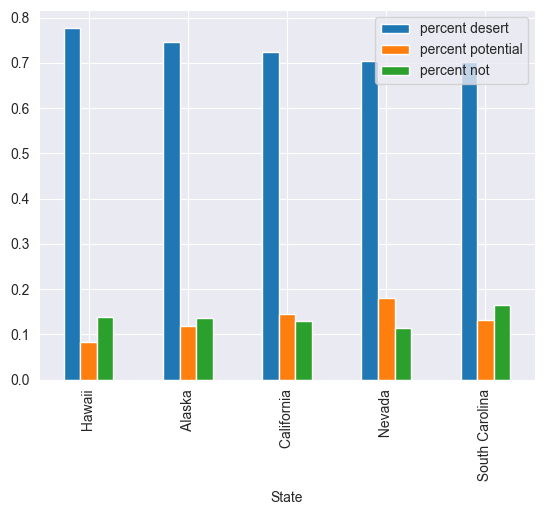

In [43]:
# bar plot of the five states with the highest percentage of bank deserts
state_by_status.nlargest(5, 'percent desert').plot(kind='bar', x='State', y=['percent desert', 'percent potential', 'percent not'])

<Axes: xlabel='State'>

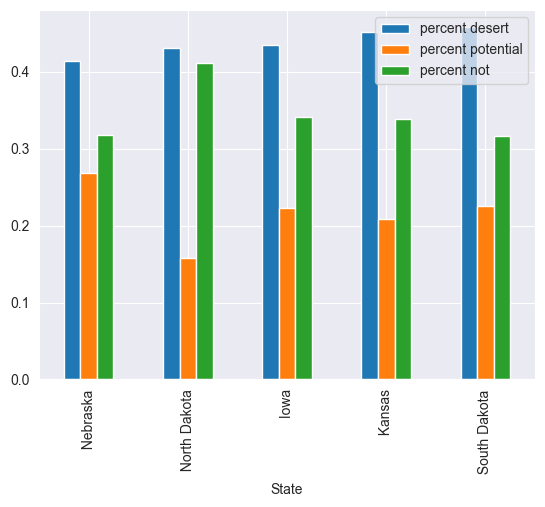

In [44]:
# bar plot of the five states with the smallest percentage of bank deserts
state_by_status.nsmallest(5, 'percent desert').plot(kind='bar', x='State', y=['percent desert', 'percent potential', 'percent not'])

<Axes: xlabel='Bank Desert Status', ylabel='OwnOcpHous%'>

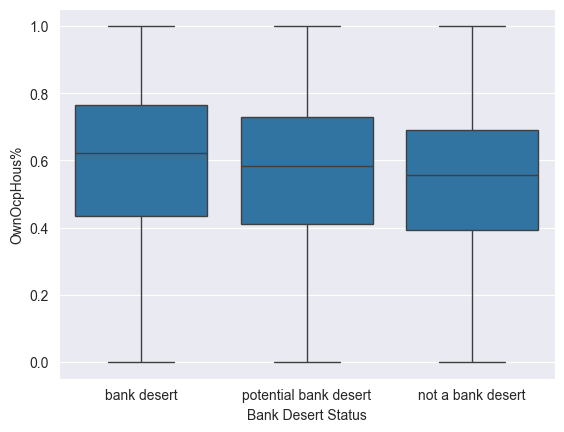

In [20]:
# boxplot of Bank Desert Status and OwnOcpHous%
sns.boxplot(complete_df, x="Bank Desert Status", y="OwnOcpHous%")

<Axes: xlabel='Bank Desert Status', ylabel='VacantHous%'>

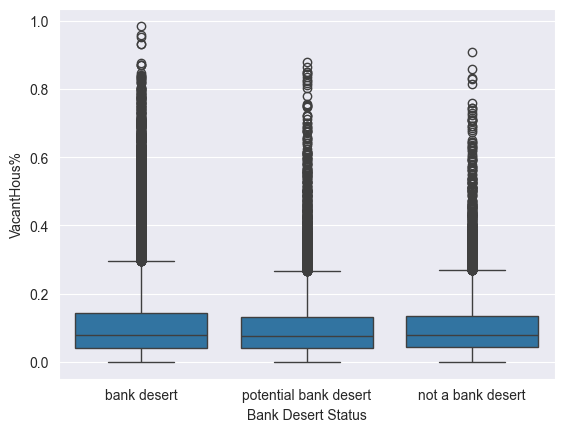

In [46]:
# boxplot of Bank Desert Status and VacantHous% with outliers
sns.boxplot(complete_df, x="Bank Desert Status", y="VacantHous%")

<Axes: xlabel='Bank Desert Status', ylabel='VacantHous%'>

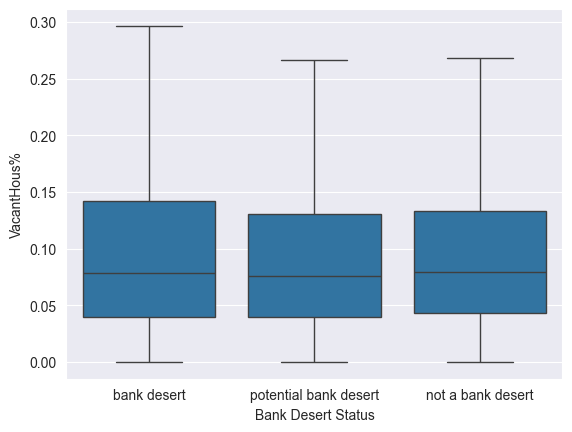

In [45]:
# boxplot of Bank Desert Status and VacantHous% without outliers
sns.boxplot(complete_df, x="Bank Desert Status", y="VacantHous%", showfliers=False)

In [51]:
# loading the bank and credit union data into a dataframe
fdic_ncua_df = pd.read_parquet('../fdic_ncua_gdf_final.parquet')

In [52]:
# examining the bank and credit union data
fdic_ncua_df.head()

,City,State,ZIP,Input Address,State Code,County Code,Tract Code,Block Code,Longitude,Latitude,FIPS 11,Bank Name,Geometry
Index,,,,,,,,,,,,,
0,Gloucester,MA,1930,"102 Rogers St, Gloucester, Massachusetts, 01930",25,009,221500,2005,-70.658897,42.613537,25009221500,"Santander Bank, N.A. Gloucester Branch",b'\x01\x01\x00\x00\x00\x85\xf4E^+\xaaQ\xc0\x90...
1,Tampa,FL,33602,"401 E Jackson St, Tampa, Florida, 33602",12,057,005101,2079,-82.456675,27.947186,12057005101,Truist Bank Truist Financial Center Branch,b'\x01\x01\x00\x00\x00]\x84\xad(:\x9dT\xc0R$h\...
2,Richmond,MO,64085,"803 Wollard Blvd, Richmond, Missouri, 64085",29,177,080202,2002,-93.959037,39.269180,29177080202,Flat Branch Bank,"b""\x01\x01\x00\x00\x00\xe6\xf1'\xdc`}W\xc0\xc4..."
3,Mendota,IL,61342,"706 Washington St, Mendota, Illinois, 61342",17,099,961900,4022,-89.118569,41.548092,17099961900,First State Bank,"b""\x01\x01\x00\x00\x00\xa4\x04\x8e\xa2\x96GV\x..."
4,Burlington,CO,80807,"410 14th St, Burlington, Colorado, 80807",08,063,962100,2065,-102.267955,39.304779,08063962100,Farmers & Merchants Bank Of Colby Burlington B...,b'\x01\x01\x00\x00\x00\x16 \xc6+&\x91Y\xc0\x1e...


In [64]:
# mapping state abbreviations to get full state names and grabbing census bureau regions and divisions
state_dict = {'AL':['Alabama','South','East South Central'],
              'AK':['Alaska','West','Pacific'],
              'AZ':['Arizona','West','Mountain'],
              'AR':['Arkansas','South','West South Central'],
              'AS':['American Samoa','No Region','No Division'],
              'CA':['California','West','Pacific'],
              'CO':['Colorado','West','Mountain'],
              'CT':['Connecticut','Northeast','New England'],
              'DE':['Delaware','South','South Atlantic'],
              'DC':['District of Columbia','South','South Atlantic'],
              'FL':['Florida','South','South Atlantic'],
              'GA':['Georgia','South','South Atlantic'],
              'GU':['Guam','No Region','No Division'],
              'HI':['Hawaii','West','Pacific'],
              'ID':['Idaho','West','Mountain'],
              'IL':['Illinois','Midwest','East North Central'],
              'IN':['Indiana','Midwest','East North Central'],
              'IA':['Iowa','Midwest','West North Central'],
              'KS':['Kansas','Midwest','West North Central'],
              'KY':['Kentucky','South','East South Central'],
              'LA':['Louisiana','South','West South Central'],
              'ME':['Maine','Northeast','New England'],
              'MD':['Maryland','South','South Atlantic'],
              'MA':['Massachusetts','Northeast','New England'],
              'MI':['Michigan','Midwest','East North Central'],
              'MN':['Minnesota','Midwest','West North Central'],
              'MS':['Mississippi','South','East South Central'],
              'MO':['Missouri','Midwest','West North Central'],
              'MT':['Montana','West','Mountain'],
              'NE':['Nebraska','Midwest','West North Central'],
              'NV':['Nevada','West','Mountain'],
              'NH':['New Hampshire','Northeast','New England'],
              'NJ':['New Jersey','Northeast','Middle Atlantic'],
              'NM':['New Mexico','West','Mountain'],
              'NY':['New York','Northeast','Middle Atlantic'],
              'NC':['North Carolina','South','South Atlantic'],
              'ND':['North Dakota','Midwest','West North Central'],
              'MP':['Northern Mariana Islands','No Region','No Division'],
              'OH':['Ohio','Midwest','East North Central'],
              'OK':['Oklahoma','South','West South Central'],
              'OR':['Oregon','West','Pacific'],
              'PA':['Pennsylvania','Northeast','Middle Atlantic'],
              'PR':['Puerto Rico','No Region','No Division'],
              'RI':['Rhode Island','Northeast','New England'],
              'SC':['South Carolina','South','South Atlantic'],
              'SD':['South Dakota','Midwest','West North Central'],
              'TN':['Tennessee','South','East South Central'],
              'TX':['Texas','South','West South Central'],
              'TT':['Trust Territories','No Region','No Division'],
              'UT':['Utah','West','Mountain'],
              'VT':['Vermont','Northeast','New England'],
              'VA':['Virginia','South','South Atlantic'],
              'VI':['Virginia Islands','No Region','No Division'],
              'WA':['Washington','West','Pacific'],
              'WV':['West Virginia','South','South Atlantic'],
              'WI':['Wisconsin','Midwest','East North Central'],
              'WY':['Wyoming','West','Mountain']}

fdic_ncua_df['Full State'] = fdic_ncua_df['State'].map(lambda x: state_dict.get(x, x)[0])
fdic_ncua_df['Census Region'] = fdic_ncua_df['State'].map(lambda x: state_dict.get(x, x)[1])
fdic_ncua_df['Census Division'] = fdic_ncua_df['State'].map(lambda x: state_dict.get(x, x)[2])

In [63]:
# creating a dataframe showing count of banks and credit unions by state
state_by_banks = fdic_ncua_df['Full State'].value_counts()

<Axes: xlabel='Full State'>

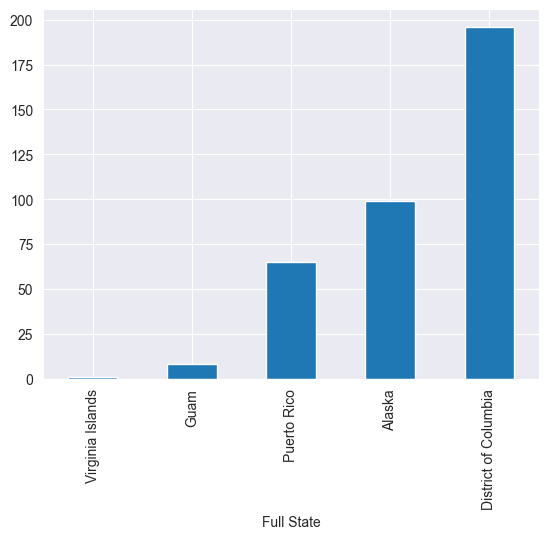

In [68]:
# bar plot of the five states/territories with the lowest number of banks/credit unions
fdic_ncua_df['Full State'].value_counts().nsmallest(5).plot(kind='bar')

<Axes: xlabel='Full State'>

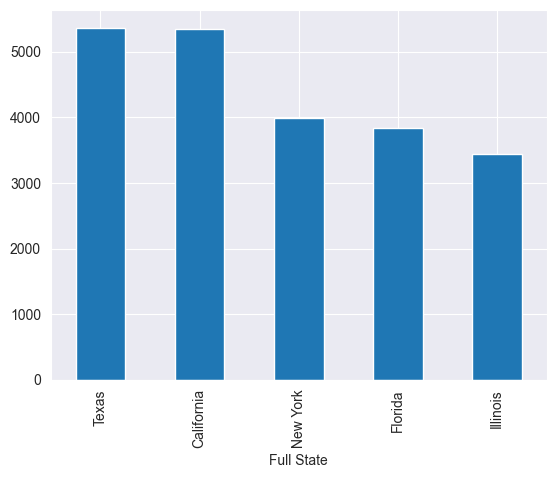

In [69]:
# bar plot of the five states/territories with the highest number of banks/credit unions
fdic_ncua_df['Full State'].value_counts().nlargest(5).plot(kind='bar')

<Axes: xlabel='Census Region'>

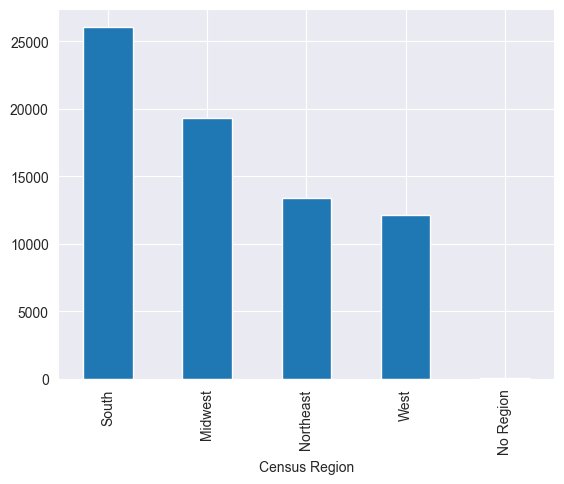

In [77]:
# bar plot of the number of banks/credit unions per region
fdic_ncua_df['Census Region'].value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Census Region'>

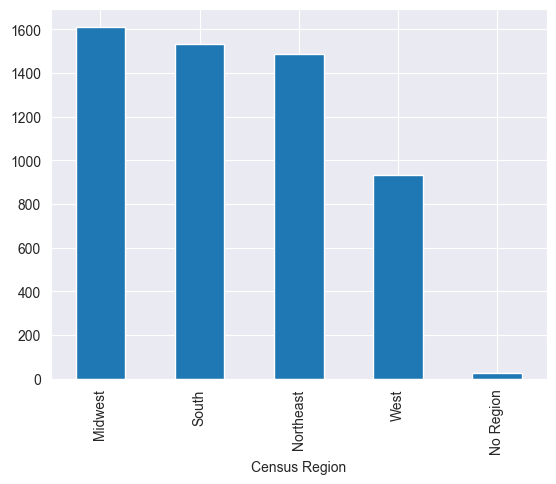

In [76]:
# bar plot of the average number of banks/credit unions in a state for each region
fdic_ncua_df[['Full State','Census Region', 'Bank Name']].groupby(['Census Region','Full State'])['Bank Name'].count().groupby('Census Region').mean().sort_values(ascending=False).plot(kind='bar')